In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import os
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [2]:
cd ../data

[Errno 2] No such file or directory: '../data'
/content


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd drive/MyDrive/Solar-Energy-Prediction-ML-Project-NTNU/data

/content/drive/MyDrive/Solar-Energy-Prediction-ML-Project-NTNU/data


<Axes: xlabel='time'>

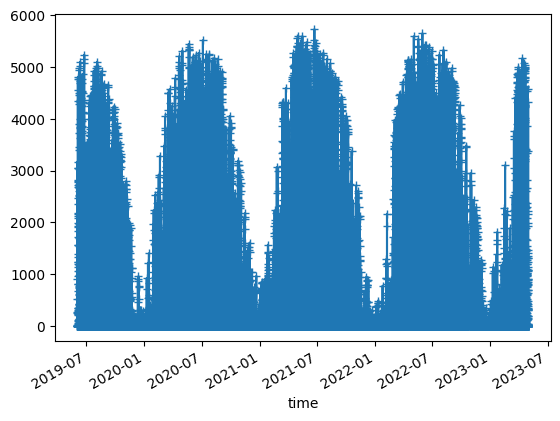

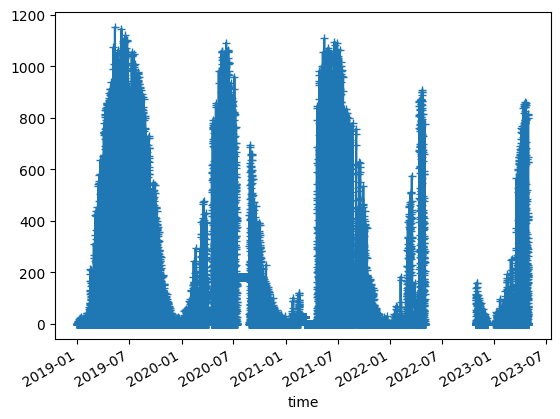

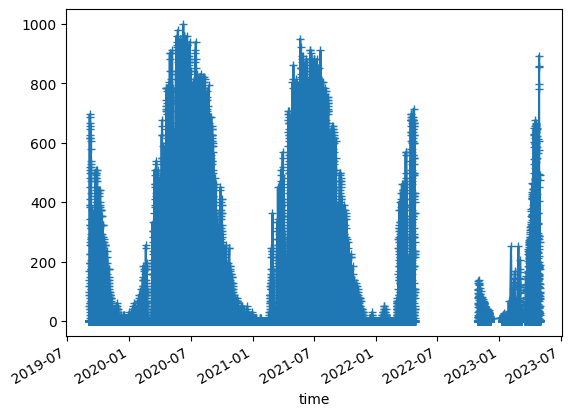

In [7]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

train_a.set_index('time', inplace = True)
train_b.set_index('time', inplace = True)
train_c.set_index('time', inplace = True)

plt.figure()
(train_a['pv_measurement']).plot(marker = '+')
plt.figure()
train_b['pv_measurement'].plot(marker = '+')
plt.figure()
train_c['pv_measurement'].plot(marker = '+')

In [8]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')

In [9]:
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')

In [10]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')

<Axes: title={'center': 'Train/Test  C'}, xlabel='date_forecast'>

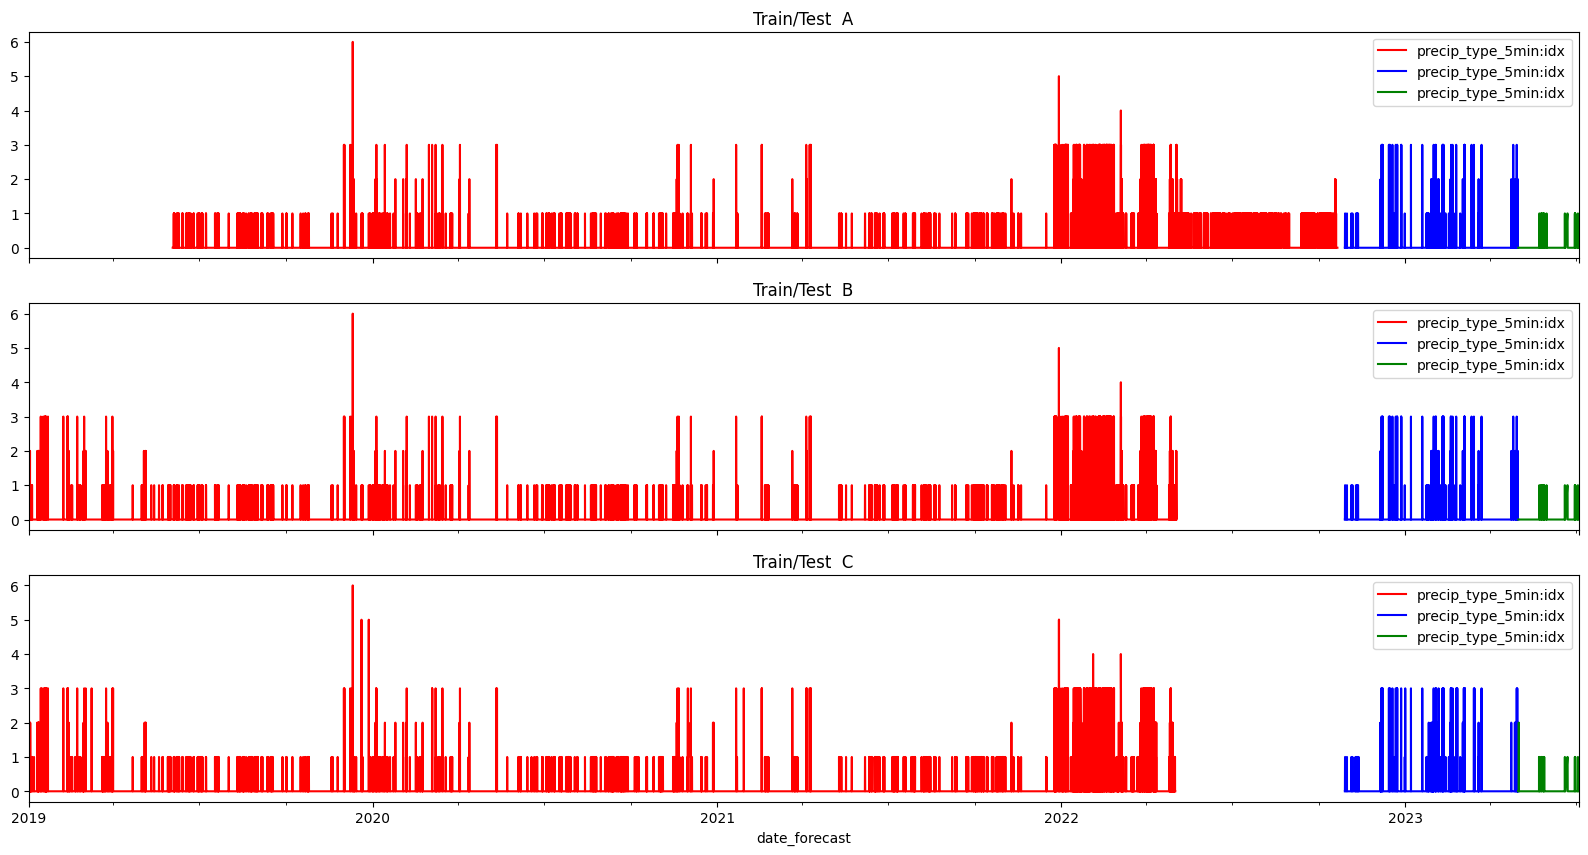

In [11]:
# Plotting a single feature
feature_name = 'precip_type_5min:idx'

fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')
X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')


# Correlation Check

In [12]:
X_train_estimated_a.drop(['date_calc', 'date_forecast'], axis = 1).corr()['effective_cloud_cover:p']
#X_train_observed_a.drop(['date_forecast'], axis = 1).corr()
#X_test_estimated_a.drop(['date_calc','date_forecast'], axis = 1).corr()

matrix_corr = X_train_estimated_a.drop(['date_calc', 'date_forecast'], axis = 1).corr()
correlated_variables = {}
for key_1 in X_train_estimated_a.drop(['date_calc', 'date_forecast'], axis = 1).keys():
    for key_2 in X_train_estimated_a.drop(['date_calc', 'date_forecast'], axis = 1).keys():
        if  abs(matrix_corr[key_1][key_2]) > 0.9 and abs(matrix_corr[key_1][key_2]) != 1:
            correlated_variables[(key_1, key_2)] = matrix_corr[key_1][key_2]
print(correlated_variables)

{('absolute_humidity_2m:gm3', 'dew_point_2m:K'): 0.9825923925578672, ('clear_sky_energy_1h:J', 'clear_sky_rad:W'): 0.9905489999326903, ('clear_sky_energy_1h:J', 'diffuse_rad:W'): 0.9045849649349028, ('clear_sky_energy_1h:J', 'diffuse_rad_1h:J'): 0.9175394751229402, ('clear_sky_rad:W', 'clear_sky_energy_1h:J'): 0.9905489999326903, ('clear_sky_rad:W', 'diffuse_rad:W'): 0.9139565352014161, ('clear_sky_rad:W', 'diffuse_rad_1h:J'): 0.9096551329627153, ('dew_point_2m:K', 'absolute_humidity_2m:gm3'): 0.9825923925578672, ('dew_point_2m:K', 't_1000hPa:K'): 0.9002278702322717, ('diffuse_rad:W', 'clear_sky_energy_1h:J'): 0.9045849649349028, ('diffuse_rad:W', 'clear_sky_rad:W'): 0.9139565352014161, ('diffuse_rad:W', 'diffuse_rad_1h:J'): 0.9866227765332353, ('diffuse_rad_1h:J', 'clear_sky_energy_1h:J'): 0.9175394751229402, ('diffuse_rad_1h:J', 'clear_sky_rad:W'): 0.9096551329627153, ('diffuse_rad_1h:J', 'diffuse_rad:W'): 0.9866227765332353, ('direct_rad:W', 'direct_rad_1h:J'): 0.9875649117141303, (

# Calculation of the locations

# Pre-processing :

In [13]:
X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
train_a = pd.read_parquet('A/train_targets.parquet')

X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')

X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

#Delete features because high correlation between them (>0.9) :
X_train_estimated_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_a.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)

X_train_estimated_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_b.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)

X_train_estimated_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)
X_train_observed_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J'], axis = 1, inplace = True)
X_test_estimated_c.drop(['clear_sky_energy_1h:J', 'dew_point_2m:K', 'diffuse_rad_1h:J',\
                                                'msl_pressure:hPa', 'pressure_50m:hPa', 'sfc_pressure:hPa',\
                                                'direct_rad_1h:J', 'date_calc'], axis = 1, inplace = True)

#Delete because constant values:
X_train_estimated_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_train_observed_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_test_estimated_a.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)

X_train_estimated_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_train_observed_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_test_estimated_b.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)

X_train_estimated_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_train_observed_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)
X_test_estimated_c.drop(['snow_density:kgm3', 'snow_drift:idx', 'wind_speed_w_1000hPa:ms'], axis = 1, inplace = True)


In [14]:
#We change the Time that is a string, to a variable in seconds
timestamp_s_observed_a = X_train_observed_a['date_forecast'].map(pd.Timestamp.timestamp)
timestamp_s_observed_b = X_train_observed_b['date_forecast'].map(pd.Timestamp.timestamp)
timestamp_s_observed_c = X_train_observed_c['date_forecast'].map(pd.Timestamp.timestamp)

timestamp_s_estimated_a = X_train_estimated_a['date_forecast'].map(pd.Timestamp.timestamp)
timestamp_s_estimated_b = X_train_estimated_b['date_forecast'].map(pd.Timestamp.timestamp)
timestamp_s_estimated_c = X_train_estimated_c['date_forecast'].map(pd.Timestamp.timestamp)

timestamp_s_test_a = X_test_estimated_a['date_forecast'].map(pd.Timestamp.timestamp)
timestamp_s_test_b = X_test_estimated_b['date_forecast'].map(pd.Timestamp.timestamp)
timestamp_s_test_c = X_test_estimated_c['date_forecast'].map(pd.Timestamp.timestamp)

#Then, we incorporate the periodicity
day = 24*60*60
year = (365.2425)*day

X_train_observed_a['Day sin'] = np.sin(timestamp_s_observed_a * (2 * np.pi / day))
X_train_observed_a['Day cos'] = np.cos(timestamp_s_observed_a * (2 * np.pi / day))
X_train_observed_a['Year sin'] = np.sin(timestamp_s_observed_a * (2 * np.pi / year))
X_train_observed_a['Year cos'] = np.cos(timestamp_s_observed_a * (2 * np.pi / year))

X_train_observed_b['Day sin'] = np.sin(timestamp_s_observed_b * (2 * np.pi / day))
X_train_observed_b['Day cos'] = np.cos(timestamp_s_observed_b * (2 * np.pi / day))
X_train_observed_b['Year sin'] = np.sin(timestamp_s_observed_b * (2 * np.pi / year))
X_train_observed_b['Year cos'] = np.cos(timestamp_s_observed_b * (2 * np.pi / year))

X_train_observed_c['Day sin'] = np.sin(timestamp_s_observed_c * (2 * np.pi / day))
X_train_observed_c['Day cos'] = np.cos(timestamp_s_observed_c * (2 * np.pi / day))
X_train_observed_c['Year sin'] = np.sin(timestamp_s_observed_c * (2 * np.pi / year))
X_train_observed_c['Year cos'] = np.cos(timestamp_s_observed_c * (2 * np.pi / year))


X_train_estimated_a['Day sin'] = np.sin(timestamp_s_estimated_a * (2 * np.pi / day))
X_train_estimated_a['Day cos'] = np.cos(timestamp_s_estimated_a * (2 * np.pi / day))
X_train_estimated_a['Year sin'] = np.sin(timestamp_s_estimated_a * (2 * np.pi / year))
X_train_estimated_a['Year cos'] = np.cos(timestamp_s_estimated_a * (2 * np.pi / year))

X_train_estimated_b['Day sin'] = np.sin(timestamp_s_estimated_b * (2 * np.pi / day))
X_train_estimated_b['Day cos'] = np.cos(timestamp_s_estimated_b * (2 * np.pi / day))
X_train_estimated_b['Year sin'] = np.sin(timestamp_s_estimated_b * (2 * np.pi / year))
X_train_estimated_b['Year cos'] = np.cos(timestamp_s_estimated_b * (2 * np.pi / year))

X_train_estimated_c['Day sin'] = np.sin(timestamp_s_estimated_c * (2 * np.pi / day))
X_train_estimated_c['Day cos'] = np.cos(timestamp_s_estimated_c * (2 * np.pi / day))
X_train_estimated_c['Year sin'] = np.sin(timestamp_s_estimated_c * (2 * np.pi / year))
X_train_estimated_c['Year cos'] = np.cos(timestamp_s_estimated_c * (2 * np.pi / year))


X_test_estimated_a['Day sin'] = np.sin(timestamp_s_test_a * (2 * np.pi / day))
X_test_estimated_a['Day cos'] = np.cos(timestamp_s_test_a * (2 * np.pi / day))
X_test_estimated_a['Year sin'] = np.sin(timestamp_s_test_a * (2 * np.pi / year))
X_test_estimated_a['Year cos'] = np.cos(timestamp_s_test_a * (2 * np.pi / year))

X_test_estimated_b['Day sin'] = np.sin(timestamp_s_test_b * (2 * np.pi / day))
X_test_estimated_b['Day cos'] = np.cos(timestamp_s_test_b * (2 * np.pi / day))
X_test_estimated_b['Year sin'] = np.sin(timestamp_s_test_b * (2 * np.pi / year))
X_test_estimated_b['Year cos'] = np.cos(timestamp_s_test_b * (2 * np.pi / year))

X_test_estimated_c['Day sin'] = np.sin(timestamp_s_test_c * (2 * np.pi / day))
X_test_estimated_c['Day cos'] = np.cos(timestamp_s_test_c * (2 * np.pi / day))
X_test_estimated_c['Year sin'] = np.sin(timestamp_s_test_c * (2 * np.pi / year))
X_test_estimated_c['Year cos'] = np.cos(timestamp_s_test_c * (2 * np.pi / year))


In [15]:
#We change the sun_azimuth variable, because an angle in degree is not really comprehensible for the machine (0 and 360 should be the same)
#therefore, we introduce the sinus and cosinus features
X_train_observed_a['sun_azimuth_cos:'] = np.cos(X_train_observed_a['sun_azimuth:d'])
X_train_observed_a['sun_azimuth_sin:'] = np.sin(X_train_observed_a['sun_azimuth:d'])
X_train_estimated_a['sun_azimuth_cos:'] = np.cos(X_train_estimated_a['sun_azimuth:d'])
X_train_estimated_a['sun_azimuth_sin:'] = np.sin(X_train_estimated_a['sun_azimuth:d'])
X_test_estimated_a['sun_azimuth_cos:'] = np.cos(X_test_estimated_a['sun_azimuth:d'])
X_test_estimated_a['sun_azimuth_sin:'] = np.sin(X_test_estimated_a['sun_azimuth:d'])
X_train_observed_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_a.drop(['sun_azimuth:d'], axis = 1, inplace = True)


X_train_observed_b['sun_azimuth_cos:'] = np.cos(X_train_observed_b['sun_azimuth:d'])
X_train_observed_b['sun_azimuth_sin:'] = np.sin(X_train_observed_b['sun_azimuth:d'])
X_train_estimated_b['sun_azimuth_cos:'] = np.cos(X_train_estimated_b['sun_azimuth:d'])
X_train_estimated_b['sun_azimuth_sin:'] = np.sin(X_train_estimated_b['sun_azimuth:d'])
X_test_estimated_b['sun_azimuth_cos:'] = np.cos(X_test_estimated_b['sun_azimuth:d'])
X_test_estimated_b['sun_azimuth_sin:'] = np.sin(X_test_estimated_b['sun_azimuth:d'])
X_train_observed_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_b.drop(['sun_azimuth:d'], axis = 1, inplace = True)

X_train_observed_c['sun_azimuth_cos:'] = np.cos(X_train_observed_c['sun_azimuth:d'])
X_train_observed_c['sun_azimuth_sin:'] = np.sin(X_train_observed_c['sun_azimuth:d'])
X_train_estimated_c['sun_azimuth_cos:'] = np.cos(X_train_estimated_c['sun_azimuth:d'])
X_train_estimated_c['sun_azimuth_sin:'] = np.sin(X_train_estimated_c['sun_azimuth:d'])
X_test_estimated_c['sun_azimuth_cos:'] = np.cos(X_test_estimated_c['sun_azimuth:d'])
X_test_estimated_c['sun_azimuth_sin:'] = np.sin(X_test_estimated_c['sun_azimuth:d'])
X_train_observed_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_train_estimated_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)
X_test_estimated_c.drop(['sun_azimuth:d'], axis = 1, inplace = True)

In [16]:
#We match the sizes of X and Y
#We keep the measurements from every hour only
X_train_estimated_a = X_train_estimated_a.loc[X_train_estimated_a.index[::4]]
X_train_observed_a = X_train_observed_a.loc[X_train_observed_a.index[::4]]
X_test_estimated_a = X_test_estimated_a.loc[X_test_estimated_a.index[::4]]


X_train_estimated_b = X_train_estimated_b.loc[X_train_estimated_b.index[::4]]
X_train_observed_b = X_train_observed_b.loc[X_train_observed_b.index[::4]]
X_test_estimated_b = X_test_estimated_b.loc[X_test_estimated_b.index[::4]]

X_train_estimated_c = X_train_estimated_c.loc[X_train_estimated_c.index[::4]]
X_train_observed_c = X_train_observed_c.loc[X_train_observed_c.index[::4]]
X_test_estimated_c = X_test_estimated_c.loc[X_test_estimated_c.index[::4]]

#We put the dates as the indexes of the data, and we remove some dates that are not in the corresponding y data.
X_train_estimated_a.set_index('date_forecast', inplace = True)
X_train_observed_a.set_index('date_forecast', inplace = True)
X_test_estimated_a.set_index('date_forecast', inplace = True)

X_train_estimated_b.set_index('date_forecast', inplace = True)
X_train_observed_b.set_index('date_forecast', inplace = True)
X_test_estimated_b.set_index('date_forecast', inplace = True)

X_train_estimated_c.set_index('date_forecast', inplace = True)
X_train_observed_c.set_index('date_forecast', inplace = True)
X_test_estimated_c.set_index('date_forecast', inplace = True)

train_a.set_index('time', inplace = True)
train_b.set_index('time', inplace = True)
train_c.set_index('time', inplace = True)

train_a.dropna(inplace = True)
train_b.dropna(inplace = True)
train_c.dropna(inplace = True)

intersection_index_estimated_a = X_train_estimated_a.index.intersection(train_a.index)
intersection_index_estimated_b = X_train_estimated_b.index.intersection(train_b.index)
intersection_index_estimated_c = X_train_estimated_c.index.intersection(train_c.index)

intersection_index_observed_a = X_train_observed_a.index.intersection(train_a.index)
intersection_index_observed_b = X_train_observed_b.index.intersection(train_b.index)
intersection_index_observed_c = X_train_observed_c.index.intersection(train_c.index)

X_train_estimated_a_matched = X_train_estimated_a.loc[intersection_index_estimated_a]
train_a_estimated_matched = train_a.loc[intersection_index_estimated_a]
X_train_observed_a_matched = X_train_observed_a.loc[intersection_index_observed_a]
train_a_observed_matched = train_a.loc[intersection_index_observed_a]

X_train_estimated_b_matched = X_train_estimated_b.loc[intersection_index_estimated_b]
train_b_estimated_matched = train_b.loc[intersection_index_estimated_b]
X_train_observed_b_matched = X_train_observed_b.loc[intersection_index_observed_b]
train_b_observed_matched = train_b.loc[intersection_index_observed_b]

X_train_estimated_c_matched = X_train_estimated_c.loc[intersection_index_estimated_c]
train_c_estimated_matched = train_c.loc[intersection_index_estimated_c]
X_train_observed_c_matched = X_train_observed_c.loc[intersection_index_observed_c]
train_c_observed_matched = train_c.loc[intersection_index_observed_c]



In [17]:
#One Hot encoding
from sklearn.preprocessing import OneHotEncoder

idx = ['dew_or_rime:idx',\
       'is_day:idx',
       'is_in_shadow:idx',
       'precip_type_5min:idx',]

for id in idx:
    concatenated_df = pd.concat([X_train_observed_a_matched[id], X_train_estimated_a_matched[id], X_test_estimated_a[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_a_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_a_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_a.index]
    X_train_observed_a_matched = pd.concat([X_train_observed_a_matched, df_observed_encoded], axis =1)
    X_train_estimated_a_matched = pd.concat([X_train_estimated_a_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_a = pd.concat([X_test_estimated_a, df_test_encoded], axis = 1)
    X_train_observed_a_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_a_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_a.drop([id], inplace = True, axis=1)

for id in idx:
    concatenated_df = pd.concat([X_train_observed_b_matched[id], X_train_estimated_b_matched[id], X_test_estimated_b[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_b_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_b_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_b.index]
    X_train_observed_b_matched = pd.concat([X_train_observed_b_matched, df_observed_encoded], axis =1)
    X_train_estimated_b_matched = pd.concat([X_train_estimated_b_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_b = pd.concat([X_test_estimated_b, df_test_encoded], axis = 1)
    X_train_observed_b_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_b_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_b.drop([id], inplace = True, axis=1)

for id in idx:
    concatenated_df = pd.concat([X_train_observed_c_matched[id], X_train_estimated_c_matched[id], X_test_estimated_c[id]])
    one_hot_encoded = pd.get_dummies(concatenated_df, prefix= id)
    df_estimated_encoded = one_hot_encoded.loc[X_train_estimated_c_matched.index]
    df_observed_encoded = one_hot_encoded.loc[X_train_observed_c_matched.index]
    df_test_encoded = one_hot_encoded.loc[X_test_estimated_c.index]
    X_train_observed_c_matched = pd.concat([X_train_observed_c_matched, df_observed_encoded], axis =1)
    X_train_estimated_c_matched = pd.concat([X_train_estimated_c_matched, df_estimated_encoded], axis = 1)
    X_test_estimated_c = pd.concat([X_test_estimated_c, df_test_encoded], axis = 1)
    X_train_observed_c_matched.drop([id], inplace = True, axis=1)
    X_train_estimated_c_matched.drop([id], inplace = True, axis=1)
    X_test_estimated_c.drop([id], inplace = True, axis=1)


absolute_humidity_2m:gm3             0
air_density_2m:kgm3                  0
ceiling_height_agl:m              6636
clear_sky_rad:W                      0
cloud_base_agl:m                  2457
diffuse_rad:W                        0
direct_rad:W                         0
effective_cloud_cover:p              0
elevation:m                          0
fresh_snow_12h:cm                    0
fresh_snow_1h:cm                     0
fresh_snow_24h:cm                    0
fresh_snow_3h:cm                     0
fresh_snow_6h:cm                     0
precip_5min:mm                       0
pressure_100m:hPa                    0
prob_rime:p                          0
rain_water:kgm2                      0
relative_humidity_1000hPa:p          0
snow_depth:cm                        0
snow_melt_10min:mm                   0
snow_water:kgm2                      0
sun_elevation:d                      0
super_cooled_liquid_water:kgm2       0
t_1000hPa:K                          0
total_cloud_cover:p      

,count,mean,std,min,25%,50%,75%,max
absolute_humidity_2m:gm3,29667.0,6.652597,2.798161,0.700000,4.400000,6.300000e+00,8.600000,17.500000
air_density_2m:kgm3,29667.0,1.249065,0.036344,1.145000,1.224000,1.247000e+00,1.272000,1.427000
ceiling_height_agl:m,23031.0,2842.004150,2554.549561,27.799999,1066.250000,1.824100e+03,3827.600098,12328.500000
clear_sky_rad:W,29667.0,166.504837,244.946899,0.000000,0.000000,8.200000e+00,285.399994,834.799988
cloud_base_agl:m,27210.0,1703.726440,1797.570190,27.900000,576.825012,1.137700e+03,2036.400024,11688.700195
diffuse_rad:W,29667.0,45.023209,64.628471,0.000000,0.000000,4.600000e+00,76.900002,336.700012
direct_rad:W,29667.0,56.562336,119.187767,0.000000,0.000000,0.000000e+00,42.799999,684.299988
effective_cloud_cover:p,29667.0,67.530106,34.388470,0.000000,42.900002,8.090000e+01,99.199997,100.000000
elevation:m,29667.0,6.000000,0.000000,6.000000,6.000000,6.000000e+00,6.000000,6.000000
fresh_snow_12h:cm,29667.0,0.053436,0.490057,0.000000,0.000000,0.000000e+00,0.000000,15.000000


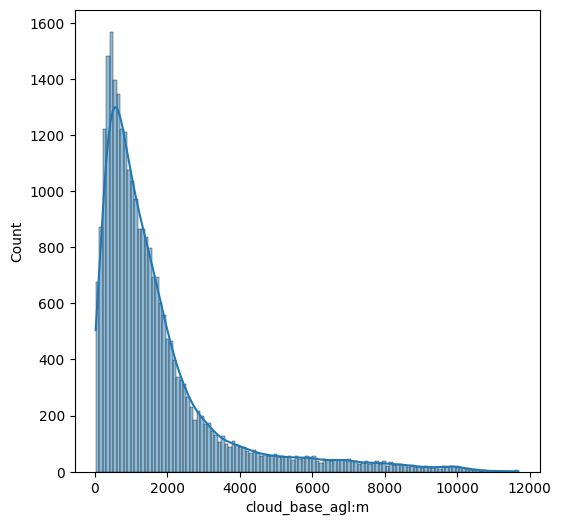

In [18]:
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

X = X_train_observed_a_matched

f = X['cloud_base_agl:m']
sns.histplot(data=f, kde=True)

print(X.isna().sum())
X.describe().transpose()

In [19]:
#Missing values
X_train_estimated_a_final = X_train_estimated_a_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_a_matched['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_train_estimated_a_matched['cloud_base_agl:m'].median()})

X_train_observed_a_final = X_train_observed_a_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_a_matched['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_train_observed_a_matched['cloud_base_agl:m'].median()})

X_test_estimated_a_final = X_test_estimated_a.fillna(value={
                'ceiling_height_agl:m' : X_test_estimated_a['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_test_estimated_a['cloud_base_agl:m'].median()})


X_train_estimated_b_final = X_train_estimated_b_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_b_matched['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_train_estimated_b_matched['cloud_base_agl:m'].median()})

X_train_observed_b_final = X_train_observed_b_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_b_matched['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_train_observed_b_matched['cloud_base_agl:m'].median()})

X_test_estimated_b_final = X_test_estimated_b.fillna(value={
                'ceiling_height_agl:m' : X_test_estimated_b['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_test_estimated_b['cloud_base_agl:m'].median()})


X_train_estimated_c_final = X_train_estimated_c_matched.fillna(value={
                'ceiling_height_agl:m' : X_train_estimated_c_matched['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_train_estimated_c_matched['cloud_base_agl:m'].median()})

X_train_observed_c_final = X_train_observed_c_matched.fillna(value={
               'ceiling_height_agl:m' : X_train_observed_c_matched['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_train_observed_c_matched['cloud_base_agl:m'].median()})

X_test_estimated_c_final = X_test_estimated_c.fillna(value={
                'ceiling_height_agl:m' : X_test_estimated_c['ceiling_height_agl:m'].median(),
                'cloud_base_agl:m' : X_test_estimated_c['cloud_base_agl:m'].median()})


In [20]:
#Normalisation
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = MinMaxScaler()
X_train_estimated_a_scaled = scaler.fit_transform(X_train_estimated_a_final)
X_train_observed_a_scaled = scaler.fit_transform(X_train_observed_a_final)
X_test_estimated_a_scaled = scaler.fit_transform(X_test_estimated_a_final)

X_train_estimated_b_scaled = scaler.fit_transform(X_train_estimated_b_final)
X_train_observed_b_scaled = scaler.fit_transform(X_train_observed_b_final)
X_test_estimated_b_scaled = scaler.fit_transform(X_test_estimated_b_final)

X_train_estimated_c_scaled = scaler.fit_transform(X_train_estimated_c_final)
X_train_observed_c_scaled = scaler.fit_transform(X_train_observed_c_final)
X_test_estimated_c_scaled = scaler.fit_transform(X_test_estimated_c_final)

absolute_humidity_2m:gm3          0
air_density_2m:kgm3               0
ceiling_height_agl:m              0
clear_sky_rad:W                   0
cloud_base_agl:m                  0
diffuse_rad:W                     0
direct_rad:W                      0
effective_cloud_cover:p           0
elevation:m                       0
fresh_snow_12h:cm                 0
fresh_snow_1h:cm                  0
fresh_snow_24h:cm                 0
fresh_snow_3h:cm                  0
fresh_snow_6h:cm                  0
precip_5min:mm                    0
pressure_100m:hPa                 0
prob_rime:p                       0
rain_water:kgm2                   0
relative_humidity_1000hPa:p       0
snow_depth:cm                     0
snow_melt_10min:mm                0
snow_water:kgm2                   0
sun_elevation:d                   0
super_cooled_liquid_water:kgm2    0
t_1000hPa:K                       0
total_cloud_cover:p               0
visibility:m                      0
wind_speed_10m:ms           

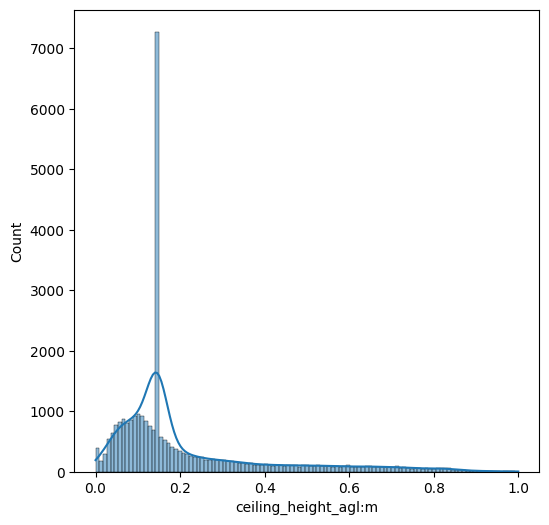

In [21]:
X = pd.DataFrame(X_train_observed_a_scaled, columns = X_train_observed_a_final.columns)
X.set_index(X_train_observed_a_final.index, inplace= True)
import seaborn as sns
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6,6))

f = X['ceiling_height_agl:m']
sns.histplot(data=f, kde=True)

print(X.isna().sum())

In [22]:
X_train_total_a = np.concatenate((X_train_observed_a_scaled, X_train_estimated_a_scaled), axis = 0)
X_train_total_b = np.concatenate((X_train_observed_b_scaled, X_train_estimated_b_scaled), axis = 0)
X_train_total_c = np.concatenate((X_train_observed_c_scaled, X_train_estimated_c_scaled), axis = 0)

# Implémentation d'un réseau de neurones
### (4 hidden layers, activation=ReLU)

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim

In [24]:
class MonNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(49, 64)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(64, 32)
        self.act2 = nn.ReLU()
        self.hidden3 = nn.Linear(32, 16)
        self.act3 = nn.ReLU()
        self.hidden4 = nn.Linear(16, 8)
        self.act4 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Linear(1,1) # not Sigmoid

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act3(self.hidden3(x))
        x = self.act4(self.hidden4(x))
        x = self.act_output(self.output(x))
        return x

### Prediction for A

In [59]:
model_a = MonNN()
print(model_a)

loss_fn = nn.L1Loss()  # MAE
optimizer = optim.Adam(model_a.parameters(), lr=0.001)

MonNN(
  (hidden1): Linear(in_features=49, out_features=64, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=64, out_features=32, bias=True)
  (act2): ReLU()
  (hidden3): Linear(in_features=32, out_features=16, bias=True)
  (act3): ReLU()
  (hidden4): Linear(in_features=16, out_features=8, bias=True)
  (act4): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Linear(in_features=1, out_features=1, bias=True)
)


In [60]:
X = torch.tensor(X_train_total_a, dtype=torch.float32)
y = torch.tensor(pd.concat([train_a_observed_matched, train_a_estimated_matched], axis = 0).to_numpy(), dtype=torch.float32).reshape(-1, 1)

n_epochs = 25 # perhaps 100
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model_a(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 0.14814117550849915
Finished epoch 1, latest loss 0.16285327076911926
Finished epoch 2, latest loss 0.053129032254219055
Finished epoch 3, latest loss 0.00031276047229766846
Finished epoch 4, latest loss 0.0017512589693069458
Finished epoch 5, latest loss 0.0013156086206436157
Finished epoch 6, latest loss 0.0023243874311447144
Finished epoch 7, latest loss 0.000891268253326416
Finished epoch 8, latest loss 0.0038316696882247925
Finished epoch 9, latest loss 0.0005229711532592773
Finished epoch 10, latest loss 0.0006176531314849854
Finished epoch 11, latest loss 0.0013275742530822754
Finished epoch 12, latest loss 0.0008658617734909058
Finished epoch 13, latest loss 0.0007012039422988892
Finished epoch 14, latest loss 0.0011110007762908936
Finished epoch 15, latest loss 0.0016827136278152466
Finished epoch 16, latest loss 0.0009479820728302002
Finished epoch 17, latest loss 0.00024147331714630127
Finished epoch 18, latest loss 0.0006315857172012329
Finishe

In [61]:
X_test = torch.tensor(X_test_estimated_a_scaled, dtype=torch.float32)

with torch.no_grad():
    y_pred_a = model_a(X_test)

In [62]:
df_pred_a = pd.DataFrame(y_pred_a)
df_pred_a.rename(columns={0: 'prediction'}, inplace=True)
df_pred_a.set_index(X_test_estimated_a_final.index, inplace = True)

<Axes: xlabel='time'>

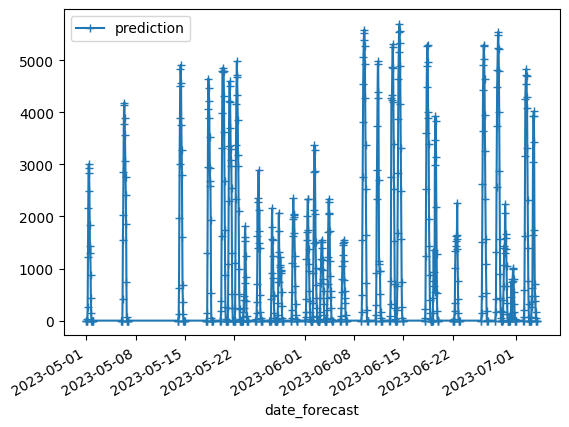

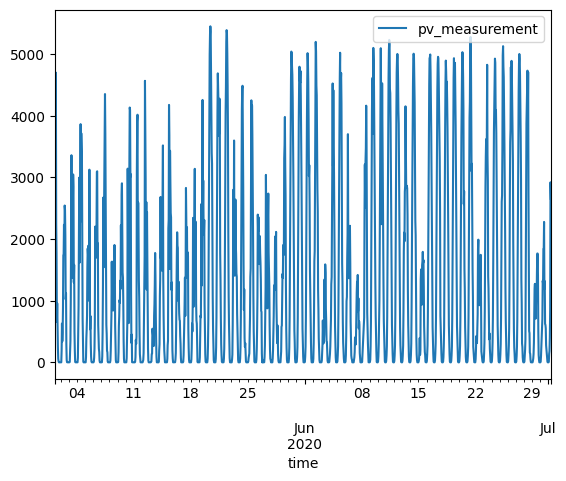

<Figure size 640x480 with 0 Axes>

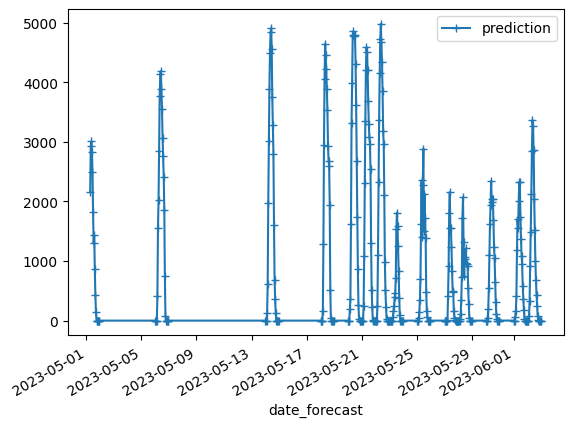

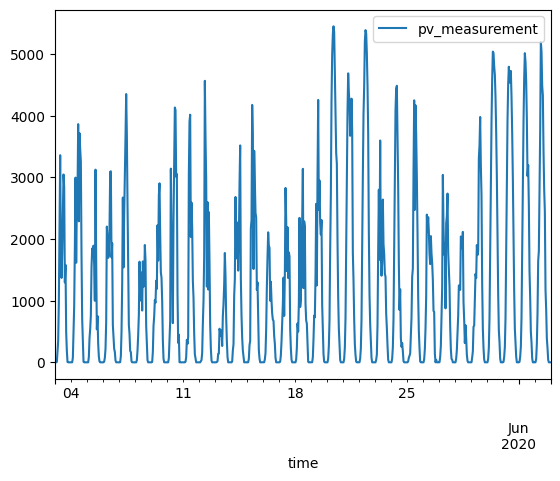

In [63]:
df_pred_a.plot(marker = '+'), train_a['2020-05-01 07:00:00' : '2020-07-01 07:00:00'].plot()
plt.figure()
df_pred_a['2023-05-01 07:00:00' : '2023-06-03 00:00:00'].plot(marker = '+')
train_a['2020-05-03 00:00:00' : '2020-06-03 00:00:00'].plot()

In [64]:
for date in df_pred_a.index :
    if df_pred_a.loc[date]['prediction'] < 0 :
        df_pred_a.loc[date]['prediction'] = 0

In [65]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_a['location'] = ['A' for i in df_pred_a.index]
df_pred_a.reset_index(inplace = True)
df_pred_a.reset_index(inplace = True)
df_pred_a.columns = ['id', 'time', 'prediction', 'location']
df_pred_a

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.000416,A
1,1,2023-05-01 01:00:00,0.000416,A
2,2,2023-05-01 02:00:00,0.000416,A
3,3,2023-05-01 03:00:00,0.000416,A
4,4,2023-05-01 04:00:00,32.681602,A
...,...,...,...,...
715,715,2023-07-03 19:00:00,55.015659,A
716,716,2023-07-03 20:00:00,0.000416,A
717,717,2023-07-03 21:00:00,0.000416,A
718,718,2023-07-03 22:00:00,0.000416,A


### Prediction for B

In [41]:
model_b = MonNN()
print(model_b)

loss_fn = nn.L1Loss()  # MAE
optimizer = optim.Adam(model_b.parameters(), lr=0.001)

MonNN(
  (hidden1): Linear(in_features=49, out_features=64, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=64, out_features=32, bias=True)
  (act2): ReLU()
  (hidden3): Linear(in_features=32, out_features=16, bias=True)
  (act3): ReLU()
  (hidden4): Linear(in_features=16, out_features=8, bias=True)
  (act4): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Linear(in_features=1, out_features=1, bias=True)
)


In [43]:
X = torch.tensor(X_train_total_b, dtype=torch.float32)
y = torch.tensor(pd.concat([train_b_observed_matched, train_b_estimated_matched], axis = 0).to_numpy(), dtype=torch.float32).reshape(-1, 1)

n_epochs = 25 # perhaps 100
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model_b(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 22.921300888061523
Finished epoch 1, latest loss 22.397876739501953
Finished epoch 2, latest loss 22.26673126220703
Finished epoch 3, latest loss 21.99403953552246
Finished epoch 4, latest loss 21.95387840270996
Finished epoch 5, latest loss 22.007442474365234
Finished epoch 6, latest loss 21.932979583740234
Finished epoch 7, latest loss 21.5419979095459
Finished epoch 8, latest loss 22.08311653137207
Finished epoch 9, latest loss 22.367332458496094
Finished epoch 10, latest loss 22.676876068115234
Finished epoch 11, latest loss 22.546335220336914
Finished epoch 12, latest loss 22.241390228271484
Finished epoch 13, latest loss 21.574363708496094
Finished epoch 14, latest loss 21.698110580444336
Finished epoch 15, latest loss 21.706401824951172
Finished epoch 16, latest loss 22.00135040283203
Finished epoch 17, latest loss 22.27984046936035
Finished epoch 18, latest loss 22.60257339477539
Finished epoch 19, latest loss 22.83224105834961
Finished epoch 20, l

In [44]:
X_test = torch.tensor(X_test_estimated_b_scaled, dtype=torch.float32)

with torch.no_grad():
    y_pred_b = model_b(X_test)

df_pred_b = pd.DataFrame(y_pred_b)
df_pred_b.rename(columns={0: 'prediction'}, inplace=True)
df_pred_b.set_index(X_test_estimated_b_final.index, inplace = True)

<Axes: xlabel='time'>

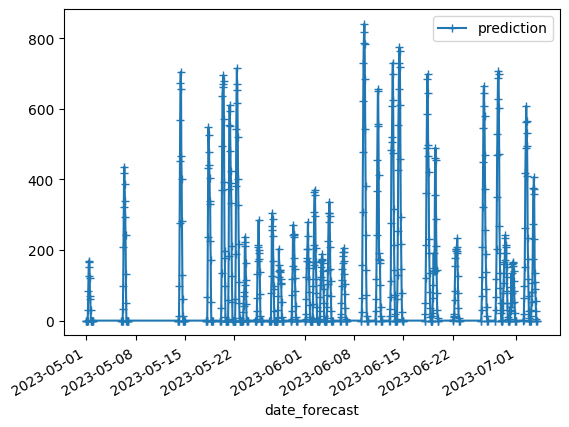

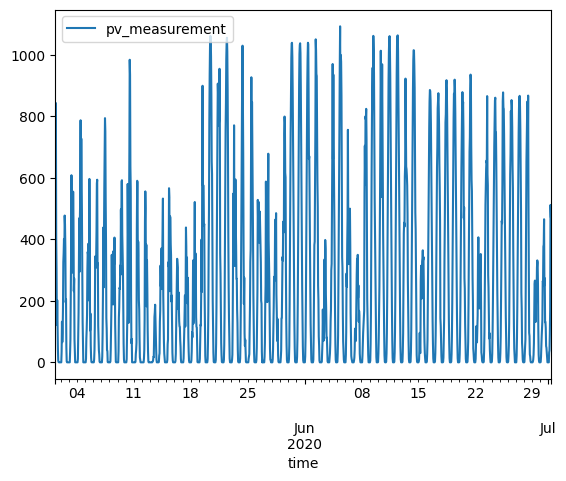

<Figure size 640x480 with 0 Axes>

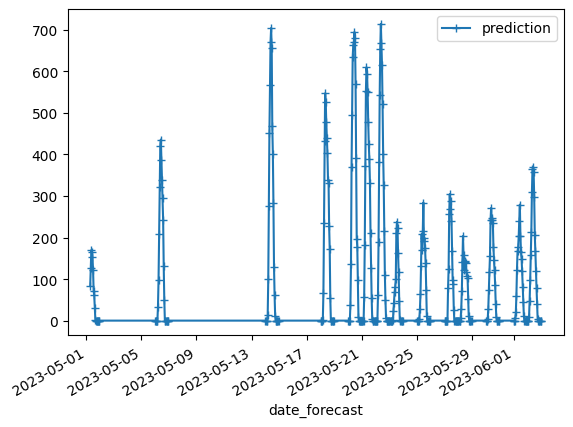

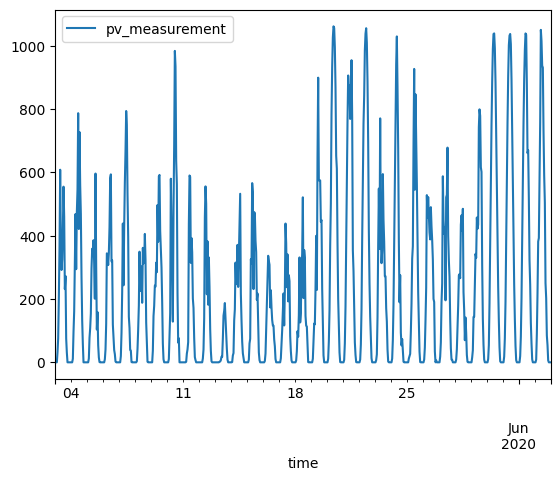

In [45]:
df_pred_b.plot(marker = '+'), train_b['2020-05-01 07:00:00' : '2020-07-01 07:00:00'].plot()
plt.figure()
df_pred_b['2023-05-01 07:00:00' : '2023-06-03 00:00:00'].plot(marker = '+')
train_b['2020-05-03 00:00:00' : '2020-06-03 00:00:00'].plot()

In [46]:
for date in df_pred_b.index :
    if df_pred_b.loc[date]['prediction'] < 0 :
        df_pred_b.loc[date]['prediction'] = 0

In [47]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_b['location'] = ['B' for i in df_pred_b.index]
df_pred_b.reset_index(inplace = True)
df_pred_b.reset_index(inplace = True)
df_pred_b.columns = ['id', 'time', 'prediction', 'location']
df_pred_b

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.001285,B
1,1,2023-05-01 01:00:00,0.001285,B
2,2,2023-05-01 02:00:00,0.001285,B
3,3,2023-05-01 03:00:00,0.001285,B
4,4,2023-05-01 04:00:00,0.001285,B
...,...,...,...,...
715,715,2023-07-03 19:00:00,25.874378,B
716,716,2023-07-03 20:00:00,5.546805,B
717,717,2023-07-03 21:00:00,0.001285,B
718,718,2023-07-03 22:00:00,0.001285,B


### Prediction for C

In [52]:
class MonNN_c(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(50, 64)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(64, 32)
        self.act2 = nn.ReLU()
        self.hidden3 = nn.Linear(32, 16)
        self.act3 = nn.ReLU()
        self.hidden4 = nn.Linear(16, 8)
        self.act4 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Linear(1,1) # not Sigmoid

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act3(self.hidden3(x))
        x = self.act4(self.hidden4(x))
        x = self.act_output(self.output(x))
        return x

In [53]:
model_c = MonNN_c()
print(model_c)

loss_fn = nn.L1Loss()  # MAE
optimizer = optim.Adam(model_c.parameters(), lr=0.001)

MonNN_c(
  (hidden1): Linear(in_features=50, out_features=64, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=64, out_features=32, bias=True)
  (act2): ReLU()
  (hidden3): Linear(in_features=32, out_features=16, bias=True)
  (act3): ReLU()
  (hidden4): Linear(in_features=16, out_features=8, bias=True)
  (act4): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Linear(in_features=1, out_features=1, bias=True)
)


In [51]:
X.shape

torch.Size([26071, 50])

In [54]:
X = torch.tensor(X_train_total_c, dtype=torch.float32)
y = torch.tensor(pd.concat([train_c_observed_matched, train_c_estimated_matched], axis = 0).to_numpy(), dtype=torch.float32).reshape(-1, 1)

n_epochs = 50 # perhaps 100
batch_size = 25

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model_c(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 106.19839477539062
Finished epoch 1, latest loss 96.59626007080078
Finished epoch 2, latest loss 91.35791015625
Finished epoch 3, latest loss 88.85587310791016
Finished epoch 4, latest loss 86.60704803466797
Finished epoch 5, latest loss 85.43665313720703
Finished epoch 6, latest loss 84.56197357177734
Finished epoch 7, latest loss 83.80271911621094
Finished epoch 8, latest loss 83.083740234375
Finished epoch 9, latest loss 82.82515716552734
Finished epoch 10, latest loss 82.97908020019531
Finished epoch 11, latest loss 82.28147888183594
Finished epoch 12, latest loss 83.14888763427734
Finished epoch 13, latest loss 82.28112030029297
Finished epoch 14, latest loss 82.40156555175781
Finished epoch 15, latest loss 82.58573150634766
Finished epoch 16, latest loss 82.3908462524414
Finished epoch 17, latest loss 81.67565155029297
Finished epoch 18, latest loss 81.72818756103516
Finished epoch 19, latest loss 81.5947036743164
Finished epoch 20, latest loss 81.92

In [55]:
X_test = torch.tensor(X_test_estimated_c_scaled, dtype=torch.float32)

with torch.no_grad():
    y_pred_c = model_c(X_test)

df_pred_c = pd.DataFrame(y_pred_c)
df_pred_c.rename(columns={0: 'prediction'}, inplace=True)
df_pred_c.set_index(X_test_estimated_c_final.index, inplace = True)

<Axes: xlabel='time'>

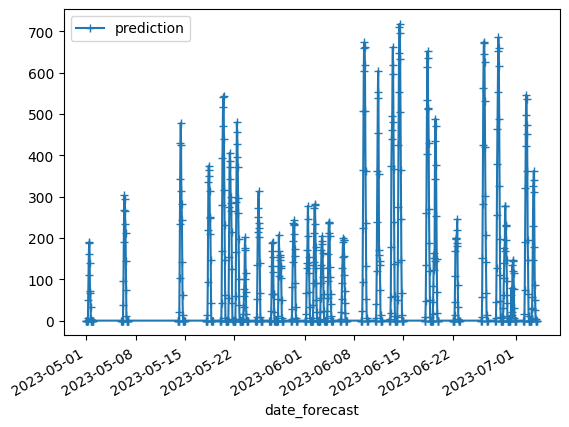

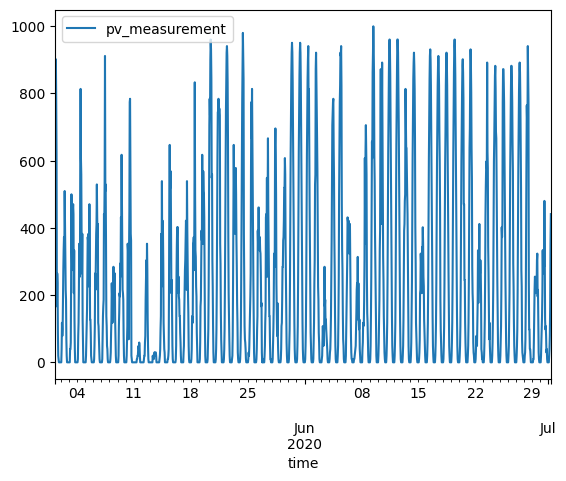

<Figure size 640x480 with 0 Axes>

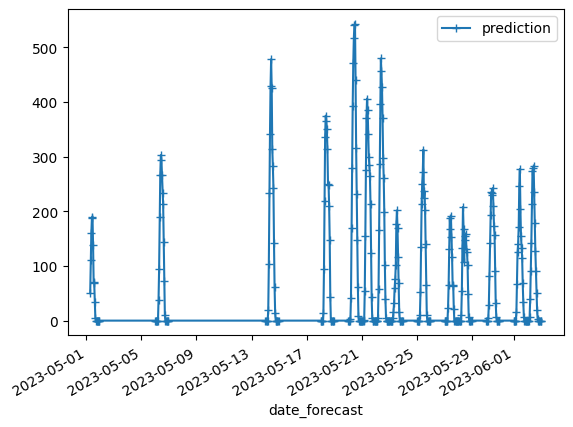

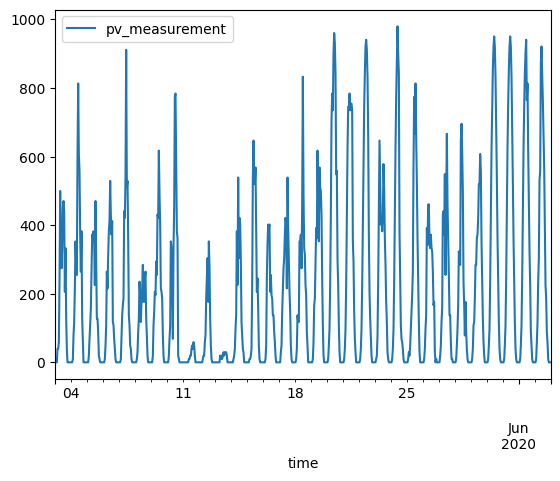

In [56]:
df_pred_c.plot(marker = '+'), train_c['2020-05-01 07:00:00' : '2020-07-01 07:00:00'].plot()
plt.figure()
df_pred_c['2023-05-01 07:00:00' : '2023-06-03 00:00:00'].plot(marker = '+')
train_c['2020-05-03 00:00:00' : '2020-06-03 00:00:00'].plot()

In [57]:
for date in df_pred_c.index :
    if df_pred_c.loc[date]['prediction'] < 0 :
        df_pred_c.loc[date]['prediction'] = 0

In [58]:
# Transform the dataFrame of the prediction, to obtain the right file to submit
df_pred_c['location'] = ['C' for i in df_pred_c.index]
df_pred_c.reset_index(inplace = True)
df_pred_c.reset_index(inplace = True)
df_pred_c.columns = ['id', 'time', 'prediction', 'location']
df_pred_c

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.002844,C
1,1,2023-05-01 01:00:00,0.002844,C
2,2,2023-05-01 02:00:00,0.002844,C
3,3,2023-05-01 03:00:00,0.002844,C
4,4,2023-05-01 04:00:00,0.002844,C
...,...,...,...,...
715,715,2023-07-03 19:00:00,0.002844,C
716,716,2023-07-03 20:00:00,0.002844,C
717,717,2023-07-03 21:00:00,0.002844,C
718,718,2023-07-03 22:00:00,0.002844,C


### Combine

In [66]:
df_pred_total = pd.concat([df_pred_a, df_pred_b, df_pred_c], axis = 0)
df_pred_final = pd.DataFrame({'id' : [i for i in range(2160)], 'prediction' : df_pred_total['prediction'].to_numpy()})
df_pred_total
#df_pred_final[0:100]

,id,time,prediction,location
0,0,2023-05-01 00:00:00,0.000416,A
1,1,2023-05-01 01:00:00,0.000416,A
2,2,2023-05-01 02:00:00,0.000416,A
3,3,2023-05-01 03:00:00,0.000416,A
4,4,2023-05-01 04:00:00,32.681602,A
...,...,...,...,...
715,715,2023-07-03 19:00:00,0.002844,C
716,716,2023-07-03 20:00:00,0.002844,C
717,717,2023-07-03 21:00:00,0.002844,C
718,718,2023-07-03 22:00:00,0.002844,C


In [67]:
df_pred_final.to_csv('submission_8.csv', index=False)